In [2]:
pip install scikit-plot

# Import Library pandas numpy and model train_test_split,RandomForestClassifier,adabost

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, precision_recall_curve, roc_curve, roc_auc_score
import scikitplot as skplt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read Data ,Check data describe and info

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# dropName,passengerId,Ticket

In [7]:
df_copy = df.copy()

In [8]:
columns = df_copy[['Name','Ticket','PassengerId']]

In [9]:
df_cleaned = df_copy.drop(columns, axis = 1)

In [10]:
df_cleaned.shape

(891, 9)

In [11]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


# Check null and drop one Coulm has more null Value

In [13]:
df_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [14]:
df_cleaned.drop(['Cabin'], axis=1,inplace=True)

In [16]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [17]:
df_cleaned['Age'].fillna(df_cleaned['Age'].mode()[0], inplace=True)

In [18]:
df_cleaned['Embarked'].fillna(df_cleaned['Embarked'].mode()[0], inplace=True)

# GetDummiies for Sex and EmbarKed

In [19]:
emb_categ = pd.get_dummies(df_cleaned['Embarked'])

In [25]:
# merge dummies to original data frame
df_testing = pd.concat([df_cleaned,emb_categ], axis =1)
df_testing.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,male,22.0,1,0,7.2500,S,0,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,0,3,male,35.0,0,0,8.0500,S,0,0,1


In [22]:
sex_categ = pd.get_dummies(df_cleaned['Sex'])
sex_categ

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [26]:
df_testing = pd.concat([df_testing,sex_categ], axis =1)
df_testing.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S,female,male
0,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0
2,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0
3,1,1,female,35.0,1,0,53.1000,S,0,0,1,1,0
4,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1


In [31]:
df_final = df_testing[['Survived','Pclass','Age','SibSp','Parch','Fare','C','Q','S','female','male']]
df_final.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,1


# put inependent Coulm in X and dependent Coulm in y


In [32]:
X = df_final.iloc[:,1:]
y = df_final.iloc[:,:1]

# Split data With test Size .2 and random state 0

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 0)

In [34]:
# Perform pre-processing to scale numeric features
scale = preprocessing.StandardScaler()
X_train = scale.fit_transform(X_train)

# Test features are scaled using the scaler computed for the training features
X_test = scale.transform(X_test)

# Training Model With RandomForestClassifier andAdaBoostClassifie, make n_n_estimator=100 

### 1. **RandomForest Classifier**

In [52]:
rf_model = RandomForestClassifier(n_estimators= 100,max_depth= 30,min_samples_split= 2,random_state=1)
rf_model.fit(X_train, y_train)
print(f'Model Accuracy for train data: {rf_model.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {rf_model.score(X_test, y_test)}')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Model Accuracy for train data: 0.9803370786516854
Model Accuracy for test data: 0.8603351955307262


**Compare Randomforest to decision tree**

In [56]:
tree = DecisionTreeClassifier(random_state= 10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [63]:
scores = []

for i in range(1, 21):
    tree = DecisionTreeClassifier(random_state=1, max_depth=i)
    tree.fit(X_train, y_train)
    score = tree.score(X_test, y_test)
    scores.append(tree.score(X_test, y_test))

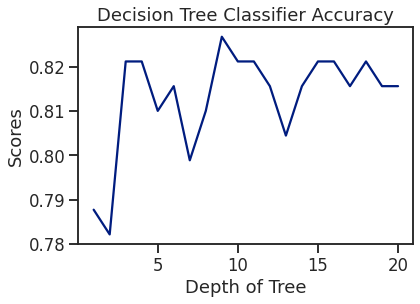

In [64]:
sns.set_context('talk')
sns.set_palette('dark')
sns.set_style('ticks')

plt.plot(range(1, 21), scores)
plt.xlabel("Depth of Tree")
plt.ylabel("Scores")
plt.title("Decision Tree Classifier Accuracy")
plt.show()

In [44]:
# Instantiate the base estimator ("weak" model)
clf_dt = DecisionTreeClassifier(max_depth= 9 )

In [45]:
# Build the Bagging classifier with 5 estimators
clf_bag =ensemble.BaggingClassifier(
base_estimator=clf_dt,
n_estimators=100
)
clf_bag.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=9,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

In [46]:
print(f'Model Accuracy for train data: {clf_bag.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {clf_bag.score(X_test, y_test)}')

Model Accuracy for train data: 0.9438202247191011
Model Accuracy for test data: 0.8268156424581006


### **2. Adaboost Classifier**

In [77]:
clf_ada = ensemble.AdaBoostClassifier(
base_estimator=clf_dt,
n_estimators=100,
learning_rate=0.9
)

clf_ada.fit(X_train,y_train)
print(f'Model Accuracy for train data: {clf_ada.score(X_train, y_train)}')
print(f'Model Accuracy for test data: {clf_ada.score(X_test, y_test)}')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model Accuracy for train data: 0.9803370786516854
Model Accuracy for test data: 0.8156424581005587
